In [160]:
import numpy as np
import matplotlib.pyplot as plt

In [161]:
#constants
m = 1
hbar = 1
N = 1000
L = 2
x = np.linspace(-10, 10, N+1)
dx = x[1]-x[0]
E = 5 # energy
p = 40 # momentum
k_0 = np.sqrt(2 * E)
sigma = 0.15 # gaussian width
x0 = 4 # inital position

In [162]:
def potential(x, L):
    V = 0*x
    V0 = p**2/(2*m)
    for i in range(len(x)):
        if x[i] > 0 and x[i]<L:
            V[i] = V0
    return V

V = potential(x, L)

In [163]:
def Hamiltonian(V, N):
    return (hbar**2/(m*dx**2))*np.diag(np.ones(N-1))+V[1:-1]*np.diag(np.ones(N-1))+ (-hbar**2/(2*m*dx**2))*np.diag(np.ones(N-2),1)+ (-hbar**2/(2*m*dx**2))*np.diag(np.ones(N-2),-1)

H = Hamiltonian(V, N)

In [164]:
E, psi = np.linalg.eigh(H)
psi = psi.T / np.sqrt(np.sum(np.abs(psi[0])**2*dx))

Text(0, 0.5, '$|\\psi|^2$')

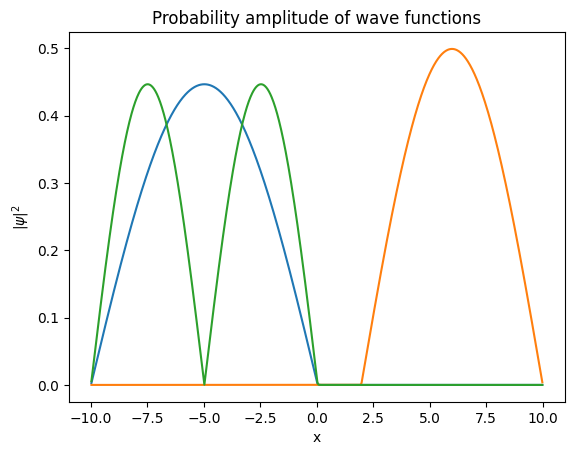

In [165]:
plt.title("Probability amplitude of wave functions")
plt.plot(x[1:-1],np.abs(psi[0]))
plt.plot(x[1:-1],np.abs(psi[1]))
plt.plot(x[1:-1],np.abs(psi[2]))
plt.xlabel('x')
plt.ylabel(r'$|\psi|^2$')

Consider the stationary Gaussian wavepacket

$$
\Psi(x,0) = e^{-\frac{(x+x_0)^2}{\sigma} + ip(x+x_0)}
$$

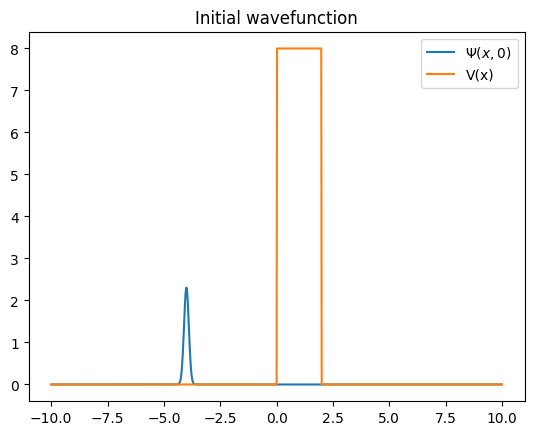

In [166]:

Psi0 = np.exp( -(x[1:-1]+x0)**2/sigma**2)*np.exp(1j*p*(x[1:-1]+x0))
A = np.sum(np.abs(Psi0)**2*dx)
Psi0 = Psi0/np.sqrt(A)
plt.title('Initial wavefunction')
plt.plot(x[1:-1],np.abs(Psi0), label= r'$\Psi(x,0)$')
plt.plot(x, 0.01*V, label = 'V(x)')
plt.legend()
plt.show()

## Time evolution of the wave function

$$
\Psi(x,0) \to \Psi(x,t) = \sum_n c_n \psi_n(x) e^{-\frac{iE_nt}{\hbar}}
$$

where the coefficients $c_n$ are given by

$$
c_n = \int_{-\infty}^\infty \psi_n^*(x)\Psi(x,0) dx
$$


In [167]:
def coeff(psi, Psi0, dx):
    c = 0*Psi0
    for i in range(len(c)):
        c[i] = np.sum(np.conj(psi[i])*Psi0*dx)
    return c

c = coeff(psi, Psi0, dx)

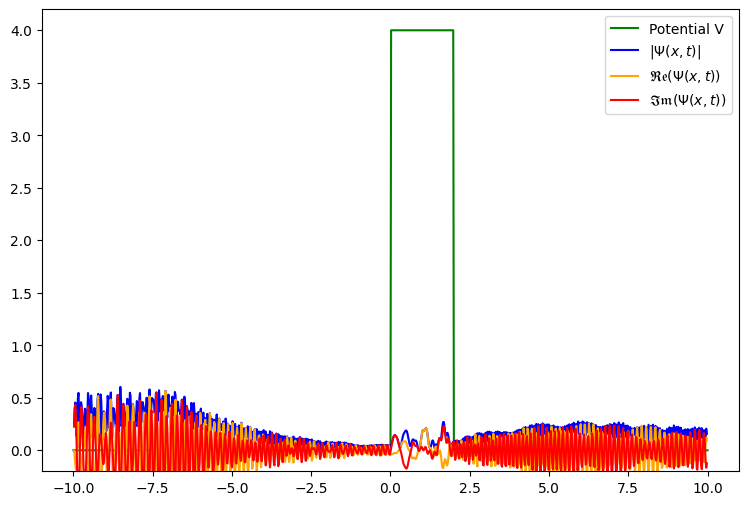

In [168]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Constants
hbar = 1.0

# Your Psi_t logic converted into an animation with abs, real, and imag parts
def Psi_t_animation(psi, c, E, V, x, t_end):
    # Initialize the figure and axis
    fig, ax = plt.subplots(figsize=(9, 6))

    # Initialize lines to be updated
    potential_line, = ax.plot(x, 0.005 * V, color='green', label="Potential V")
    abs_line, = ax.plot([], [], color='blue', label=r"$|\Psi(x, t)|$")
    real_line, = ax.plot([], [], color='orange', label=r"$\mathfrak{Re}(\Psi(x, t))$")
    imag_line, = ax.plot([], [], color='red', label=r"$\mathfrak{Im}(\Psi(x, t))$")

    ax.legend()

    # Time variable
    dt = 0.01
    t_values = np.arange(0, t_end, dt)  # Time values

    # Update function for animation
    def update(t):
        Psi = np.zeros_like(psi[0], dtype=complex)
        for i in range(len(c)):
            Psi += c[i] * psi[i] * np.exp(-1j * E[i] * t / hbar)

        abs_line.set_data(x[1:-1], np.abs(Psi))
        real_line.set_data(x[1:-1], np.real(Psi))
        imag_line.set_data(x[1:-1], np.imag(Psi))

        return abs_line, real_line, imag_line, potential_line

    ani = FuncAnimation(fig, update, frames=t_values, blit=True, interval=80)

    return ani

ani = Psi_t_animation(psi, c, E, V, x, 0.5)
HTML(ani.to_jshtml())
